In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

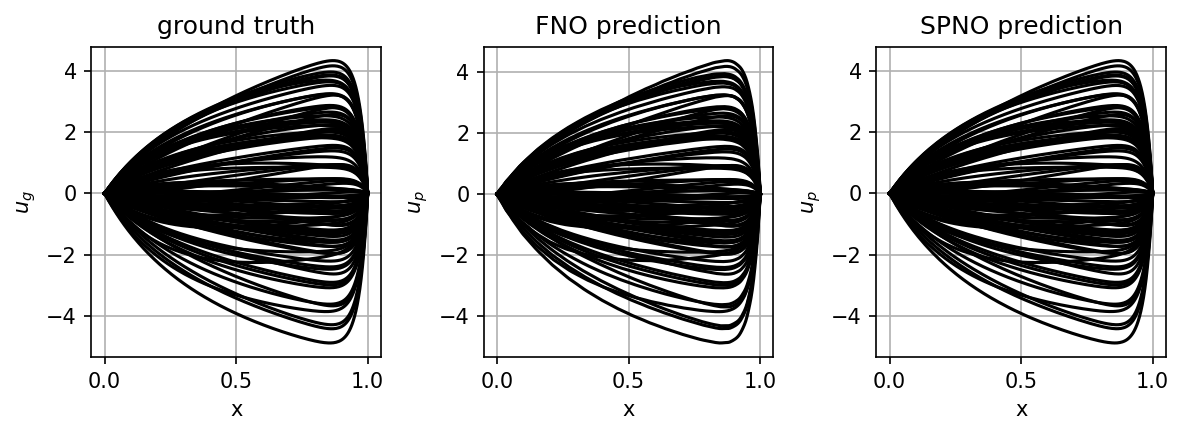

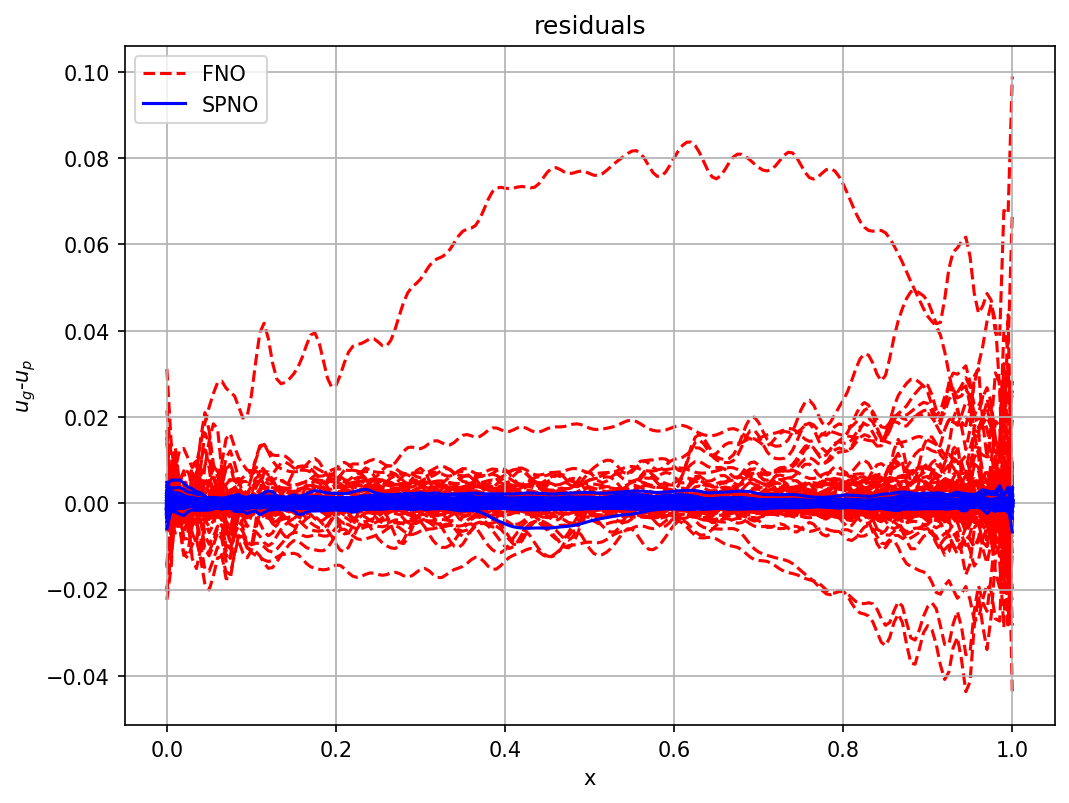

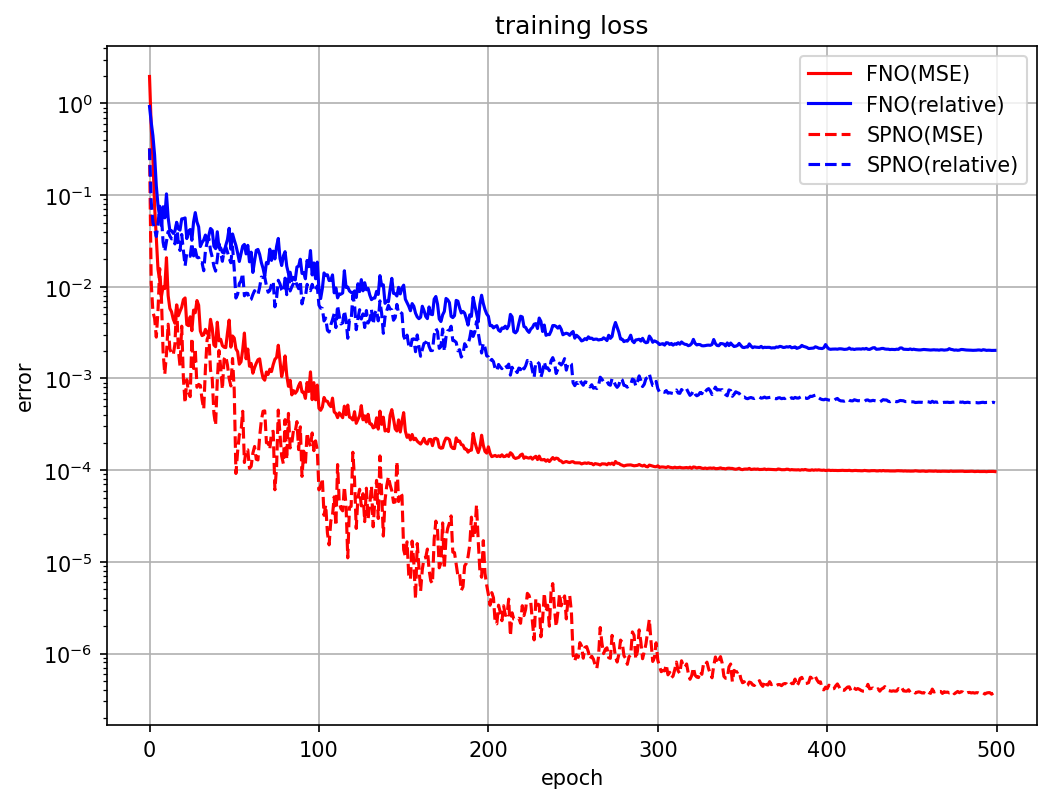

In [2]:
x_data = np.load('data/spde_1_x.npy')
y_data = np.load('data/spde_1_y.npy')
x_grid = np.linspace(0,1,x_data.shape[-1])

model_1 = torch.load('model/fno_1')
model_2 = torch.load('model/spno_1')
x_test = x_data[-100:,::5]
y_test = y_data[-100:,::5]
x_grid = x_grid[::5]
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_test = torch.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda(), y.cuda()
        out_1 = model_1(x).view(-1)
        out_2 = model_2(x).view(-1)
        pred_1[index] = out_1
        pred_2[index] = out_2
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

fig0 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,3,1)
plt.title("ground truth")
for i in range(100):
    plt.plot(x_grid,y_test[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_g$")
plt.grid()

plt.subplot(1,3,2)
plt.title("FNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_1[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_2[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()
plt.tight_layout()
plt.show()


fig1 = plt.figure(figsize=(8,6),dpi=150)
plt.title("residuals")
for i in range(100):
    if i==0:
        plt.plot(x_grid,res_1[i],'r--',zorder=1,label='FNO')
        plt.plot(x_grid,res_2[i],'b-',zorder=2,label='SPNO')
    else:
        plt.plot(x_grid,res_1[i],'r--',zorder=1)
        plt.plot(x_grid,res_2[i],'b-',zorder=2)
plt.xlabel("x")
plt.ylabel("$u_g$-$u_p$")
plt.grid()
plt.legend()
plt.show()



data_1 = np.load('data/fno_loss_1.npy')
data_2 = np.load('data/spno_loss_1.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/ordinary_notp_prediction.png")
fig1.savefig("img/ordinary_notp_residual.png")
fig2.savefig("img/ordinary_notp_loss.png")

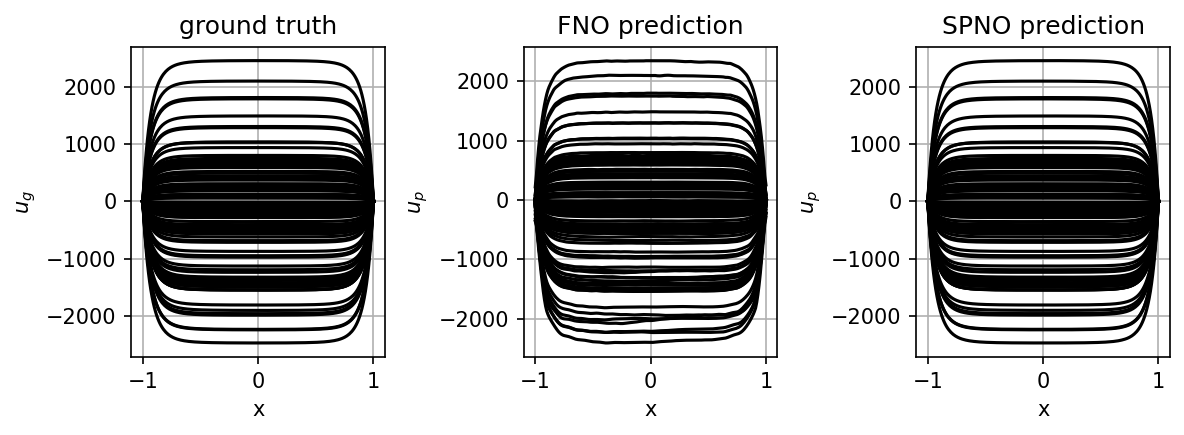

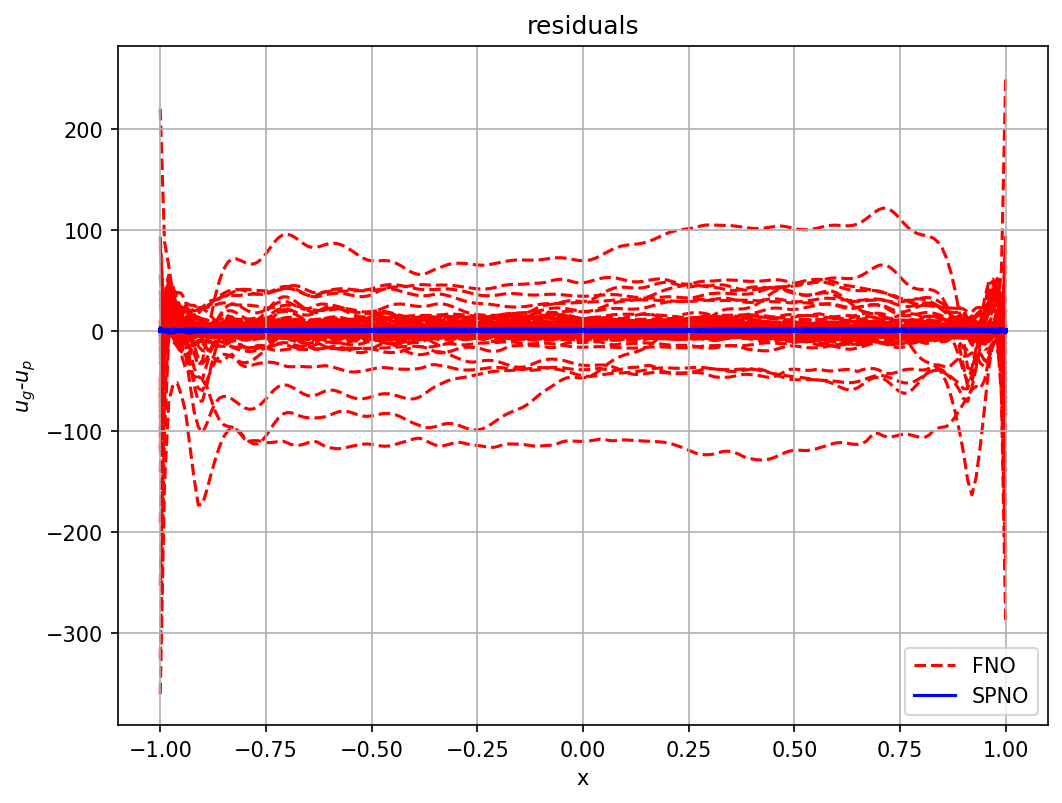

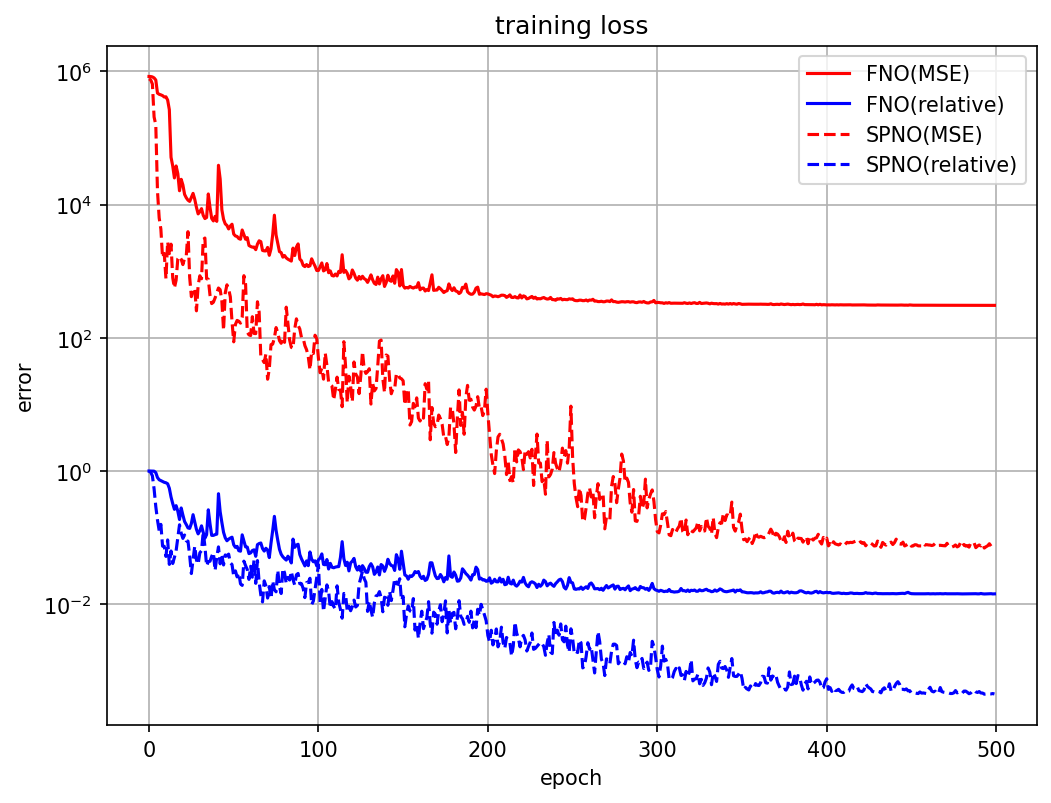

In [3]:
x_data = np.load('data/spde_2_x.npy')
y_data = np.load('data/spde_2_y.npy')
x_grid = np.linspace(-1,1,x_data.shape[-1])

model_1 = torch.load('model/fno_2')
model_2 = torch.load('model/spno_2')
x_test = x_data[-100:,::5]
y_test = y_data[-100:,::5]
x_grid = x_grid[::5]
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_test = torch.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda(), y.cuda()
        out_1 = model_1(x).view(-1)
        out_2 = model_2(x).view(-1)
        pred_1[index] = out_1
        pred_2[index] = out_2
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

fig0 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,3,1)
plt.title("ground truth")
for i in range(100):
    plt.plot(x_grid,y_test[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_g$")
plt.grid()

plt.subplot(1,3,2)
plt.title("FNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_1[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_2[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()
plt.tight_layout()
plt.show()

fig1 = plt.figure(figsize=(8,6),dpi=150)
plt.title("residuals")
for i in range(100):
    if i==0:
        plt.plot(x_grid,res_1[i],'r--',zorder=1,label='FNO')
        plt.plot(x_grid,res_2[i],'b-',zorder=2,label='SPNO')
    else:
        plt.plot(x_grid,res_1[i],'r--',zorder=1)
        plt.plot(x_grid,res_2[i],'b-',zorder=2)
plt.xlabel("x")
plt.ylabel("$u_g$-$u_p$")
plt.grid()
plt.legend()
plt.show()


data_1 = np.load('data/fno_loss_2.npy')
data_2 = np.load('data/spno_loss_2.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/ordinary_tp_prediction.png")
fig1.savefig("img/ordinary_tp_residual.png")
fig2.savefig("img/ordinary_tp_loss.png")

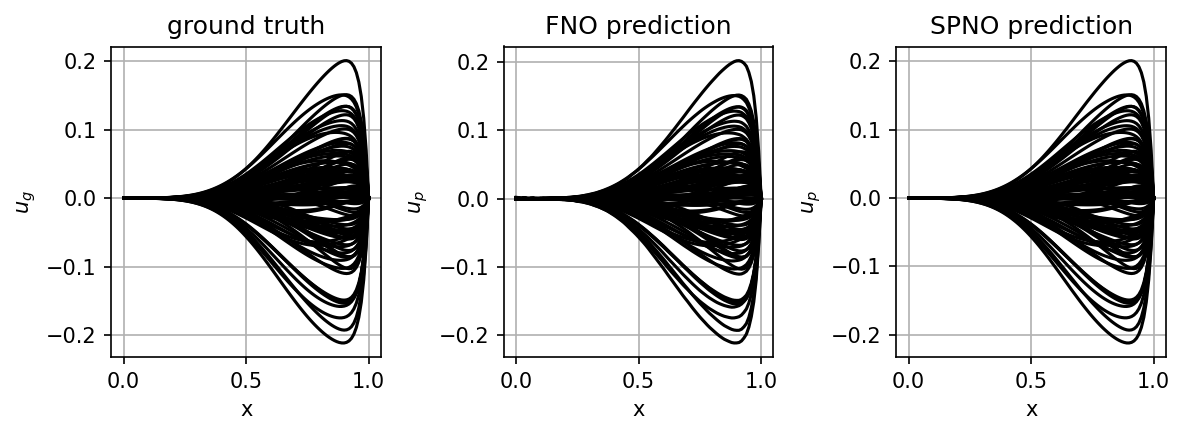

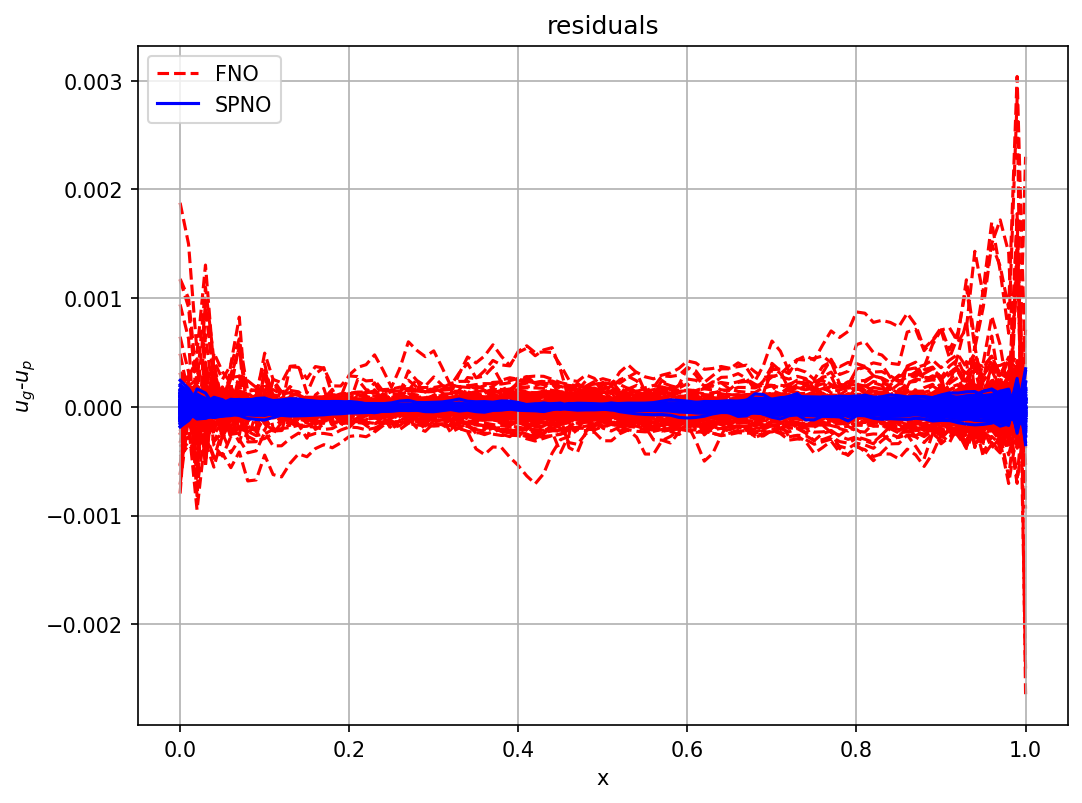

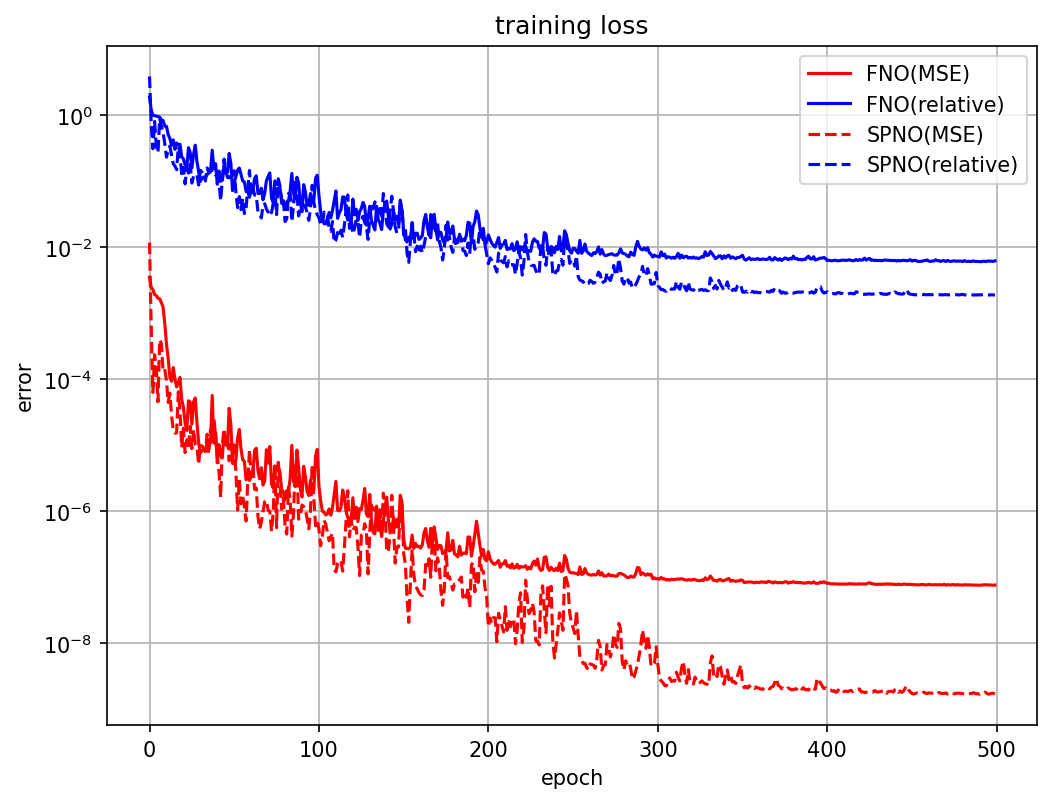

In [4]:
x_data = np.load('data/spde_ib_x.npy')
y_data = np.load('data/spde_ib_y.npy')[:,50]
x_grid = np.linspace(0,1,x_data.shape[-1])

model_1 = torch.load('model/fno_ib')
model_2 = torch.load('model/spno_ib')
x_test = x_data[-100:]
y_test = y_data[-100:]
x_grid = x_grid[:]
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_test = torch.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda(), y.cuda()
        out_1 = model_1(x).view(-1)
        out_2 = model_2(x).view(-1)
        pred_1[index] = out_1
        pred_2[index] = out_2
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

fig0 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,3,1)
plt.title("ground truth")
for i in range(100):
    plt.plot(x_grid,y_test[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_g$")
plt.grid()

plt.subplot(1,3,2)
plt.title("FNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_1[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_2[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()
plt.tight_layout()
plt.show()

fig1 = plt.figure(figsize=(8,6),dpi=150)
plt.title("residuals")
for i in range(100):
    if i==0:
        plt.plot(x_grid,res_1[i],'r--',zorder=1,label='FNO')
        plt.plot(x_grid,res_2[i],'b-',zorder=2,label='SPNO')
    else:
        plt.plot(x_grid,res_1[i],'r--',zorder=1)
        plt.plot(x_grid,res_2[i],'b-',zorder=2)
plt.xlabel("x")
plt.ylabel("$u_g$-$u_p$")
plt.grid()
plt.legend()
plt.show()


data_1 = np.load('data/fno_loss_ib.npy')
data_2 = np.load('data/spno_loss_ib.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/initialboundary_prediction.png")
fig1.savefig("img/initialboundary_residual.png")
fig2.savefig("img/initialboundary_loss.png")

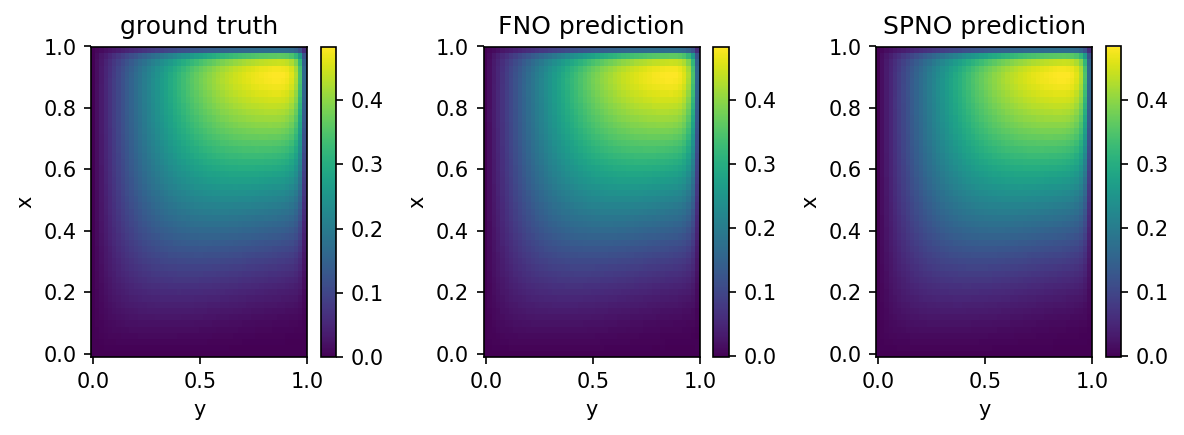

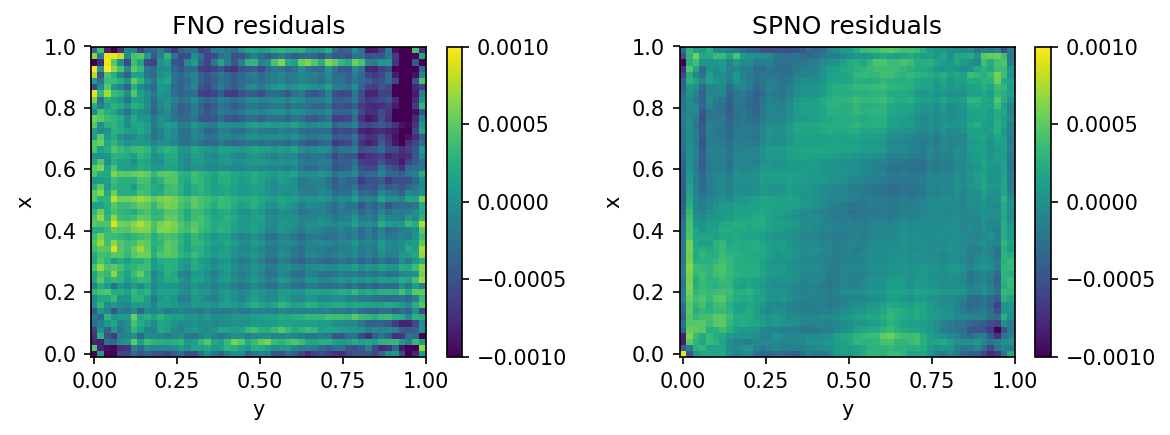

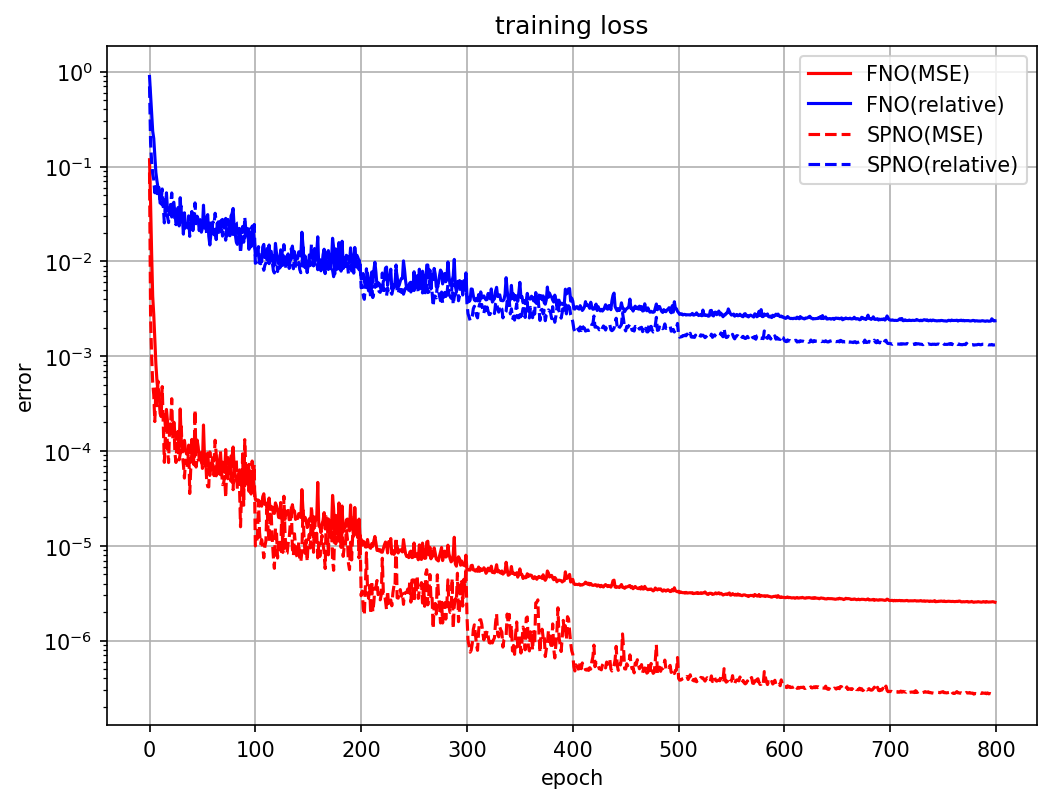

In [5]:
x_data = np.load('data/spde_2d_x.npy')
y_data = np.load('data/spde_2d_y.npy')
x_grid = np.linspace(0,1,x_data.shape[-1])
y_grid = x_grid

model_1 = torch.load('model/fno_2d')
model_2 = torch.load('model/spno_2d')
x_test = x_data[-100:,::2,::2]
y_test = y_data[-100:,::2,::2]
x_grid = x_grid[::2]
y_grid = y_grid[::2]

x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_test = torch.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda(), y.cuda()
        out_1 = model_1(x).view(-1)
        out_2 = model_2(x).view(-1)
        pred_1[index] = out_1.reshape(y_test.shape[1], y_test.shape[2])
        pred_2[index] = out_2.reshape(y_test.shape[1], y_test.shape[2])
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

X, Y = np.meshgrid(x_grid, y_grid)

fig0 = plt.figure(figsize=(8,3),dpi=150)

plt.subplot(1,3,1)
plt.title("ground truth")
plt.pcolormesh(X, Y, y_test[71], shading='auto')
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar()

plt.subplot(1,3,2)
plt.title("FNO prediction")
plt.pcolormesh(X, Y, pred_1[71], shading='auto')
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
plt.pcolormesh(X, Y, pred_2[71], shading='auto')
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar()
plt.tight_layout()
plt.show()

fig1 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,2,1)
plt.title("FNO residuals")
plt.pcolormesh(X, Y, res_1[71], shading='auto',vmin=-0.001,vmax=0.001)
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar()
plt.subplot(1,2,2)
plt.title("SPNO residuals")
plt.pcolormesh(X, Y, res_2[71], shading='auto',vmin=-0.001,vmax=0.001)
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar()
plt.tight_layout()
plt.show()

data_1 = np.load('data/fno_loss_2d.npy')
data_2 = np.load('data/spno_loss_2d.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/2d_prediction.png")
fig1.savefig("img/2d_residual.png")
fig2.savefig("img/2d_loss.png")

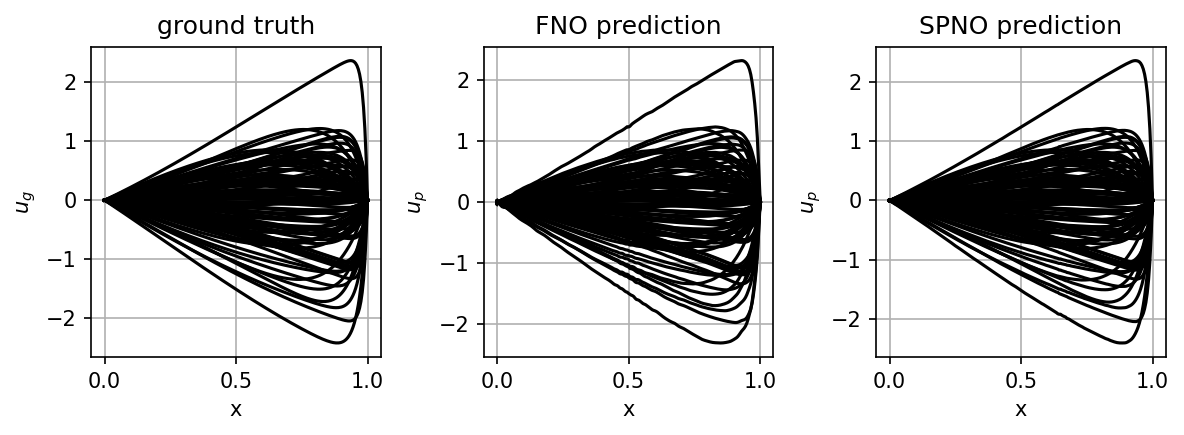

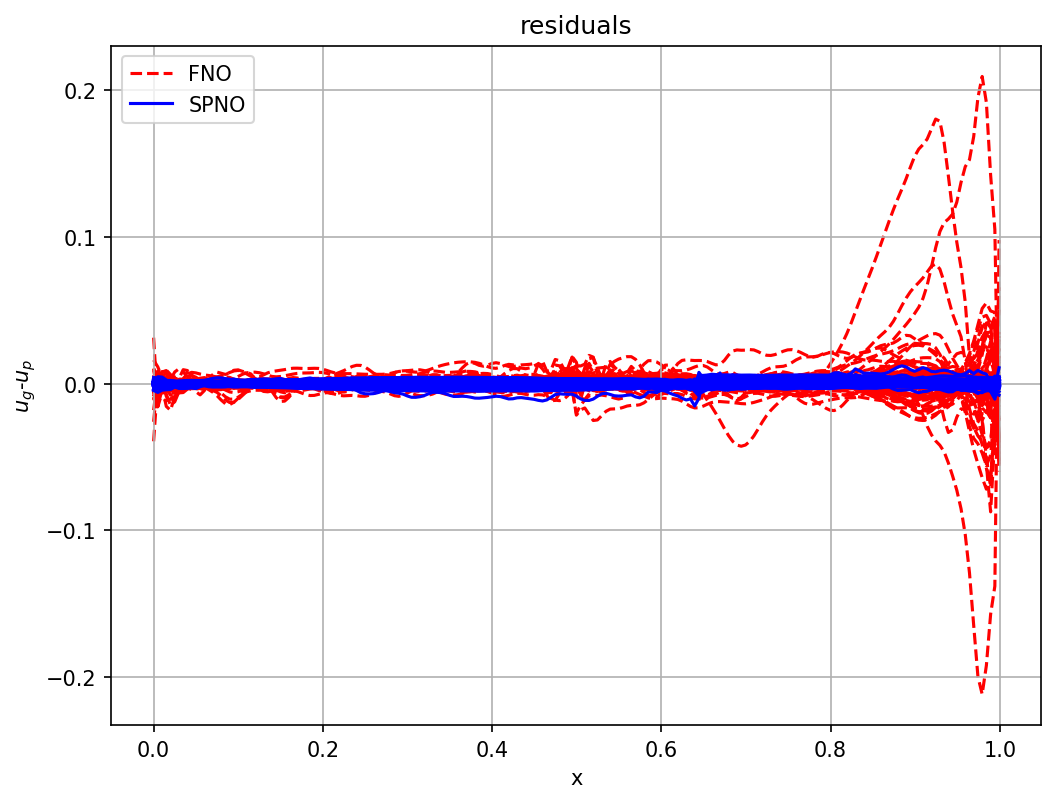

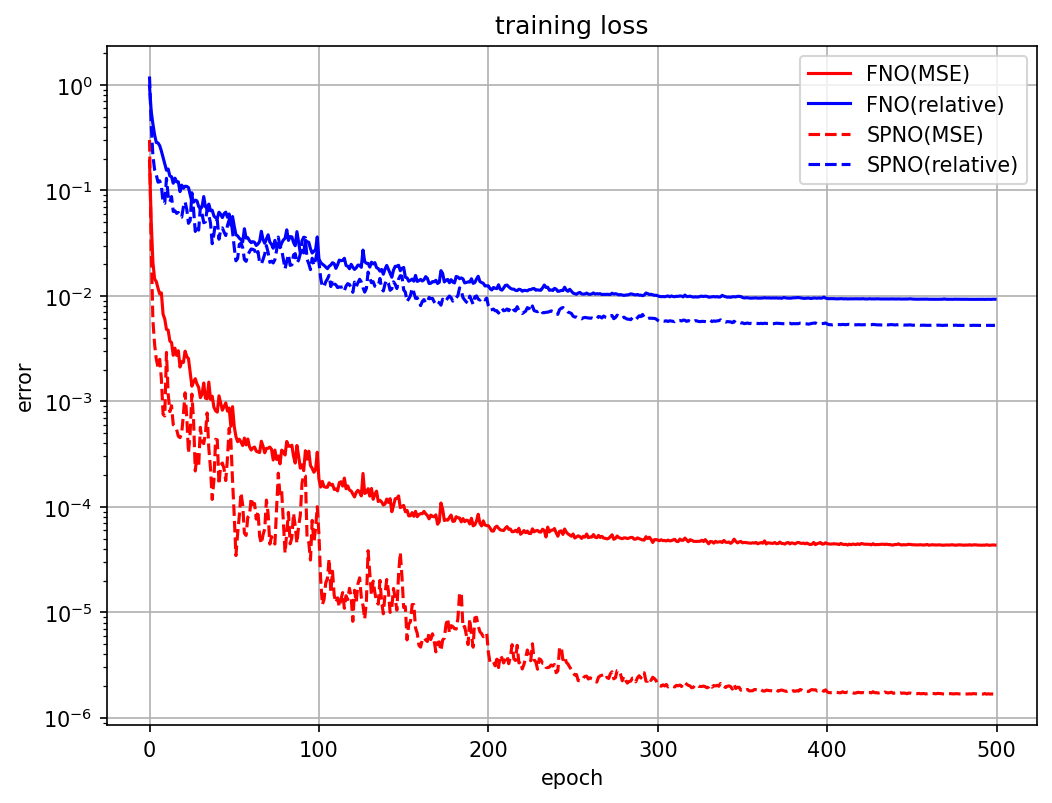

In [6]:
x_data = np.load('data/spde_mul_x.npy')
y_data = np.load('data/spde_mul_y.npy')

res = np.zeros((x_data.shape[0],2,x_data.shape[1]-1))
for i in range(x_data.shape[0]):
    res[i,0] = x_data[i,:-1]
    res[i,1] += x_data[i,-1]
    
x_grid = np.linspace(0,1,x_data.shape[-1])
eps = x_data[:,-1][:,None]
x_data = x_data[:,::5]
res = res[:,:,::5]
y_data = y_data[:,::5]
x_grid = x_grid[::5]

x_data = np.concatenate((x_data,eps),-1)

model_1 = torch.load('model/fno_mul')
model_2 = torch.load('model/spno_mul')
x_test_1 = res[-100:]
x_test_2 = x_data[-100:]
y_test = y_data[-100:]
x_grid = x_grid[:]
x_test_1 = torch.Tensor(x_test_1)
x_test_2 = torch.Tensor(x_test_2)
y_test = torch.Tensor(y_test)
x_test_1 = torch.reshape(x_test_1,(x_test_1.shape[0],x_test_1.shape[2],x_test_1.shape[1]))
x_test_2 = torch.reshape(x_test_2,(x_test_2.shape[0],x_test_2.shape[1],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test_1, x_test_2, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x1, x2, y in test_loader:
        x1, x2, y = x1.cuda(), x2.cuda(), y.cuda()
        out_1 = model_1(x1).view(-1)
        out_2 = model_2(x2).view(-1)
        pred_1[index] = out_1
        pred_2[index] = out_2
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

fig0 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,3,1)
plt.title("ground truth")
for i in range(100):
    plt.plot(x_grid,y_test[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_g$")
plt.grid()

plt.subplot(1,3,2)
plt.title("FNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_1[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_2[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()
plt.tight_layout()
plt.show()


fig1 = plt.figure(figsize=(8,6),dpi=150)
plt.title("residuals")
for i in range(100):
    if i==0:
        plt.plot(x_grid,res_1[i],'r--',zorder=1,label='FNO')
        plt.plot(x_grid,res_2[i],'b-',zorder=2,label='SPNO')
    else:
        plt.plot(x_grid,res_1[i],'r--',zorder=1)
        plt.plot(x_grid,res_2[i],'b-',zorder=2)
plt.xlabel("x")
plt.ylabel("$u_g$-$u_p$")
plt.grid()
plt.legend()
plt.show()



data_1 = np.load('data/fno_loss_mul.npy')
data_2 = np.load('data/spno_loss_mul.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/multiple_prediction.png")
fig1.savefig("img/multiple_residual.png")
fig2.savefig("img/multiple_loss.png")

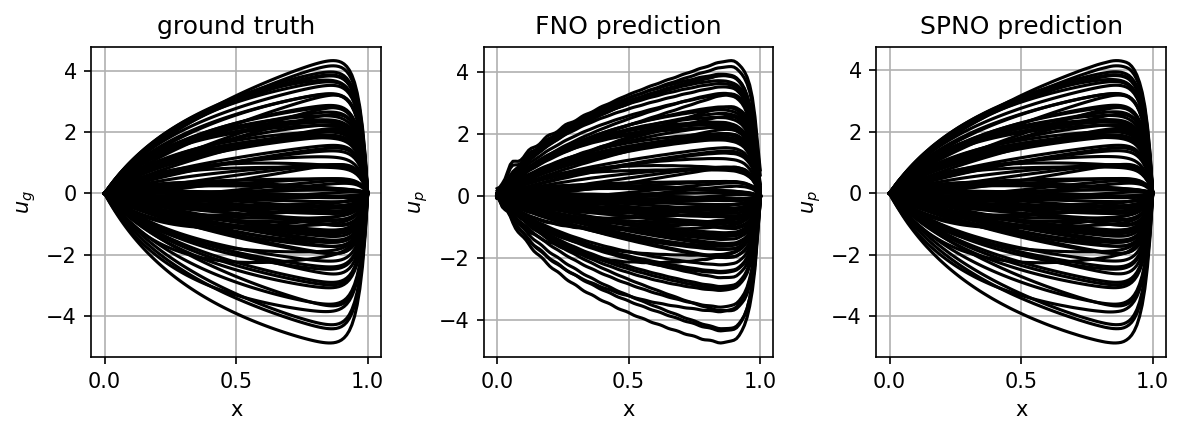

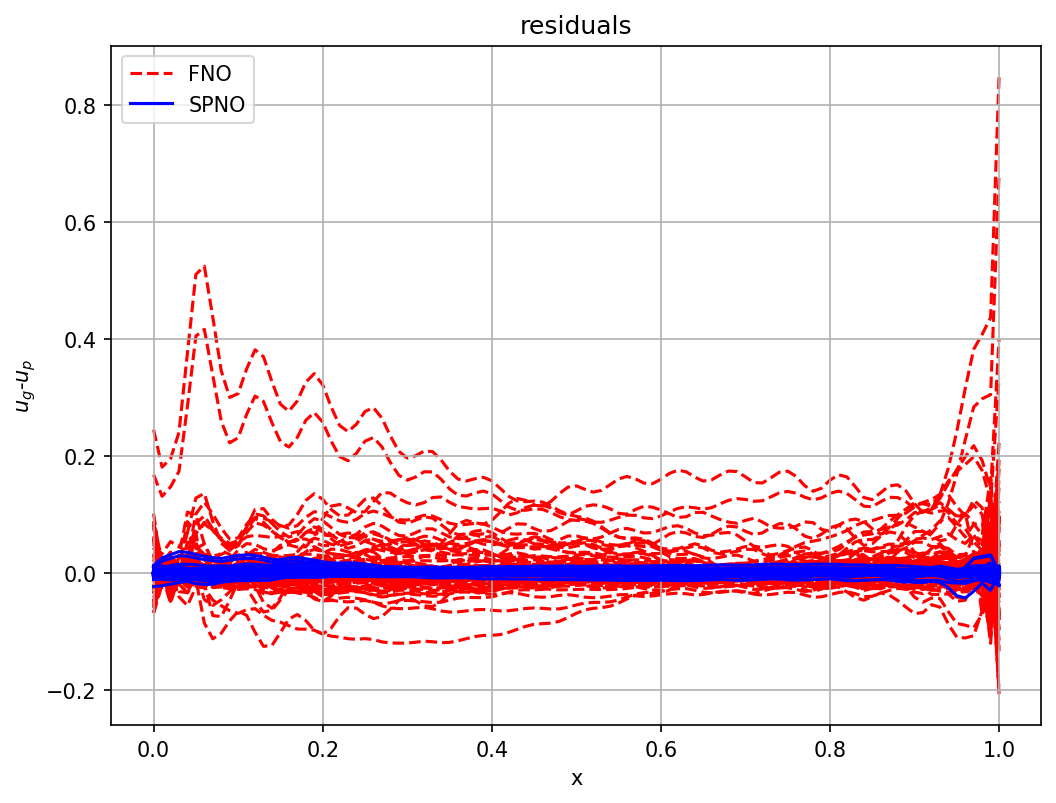

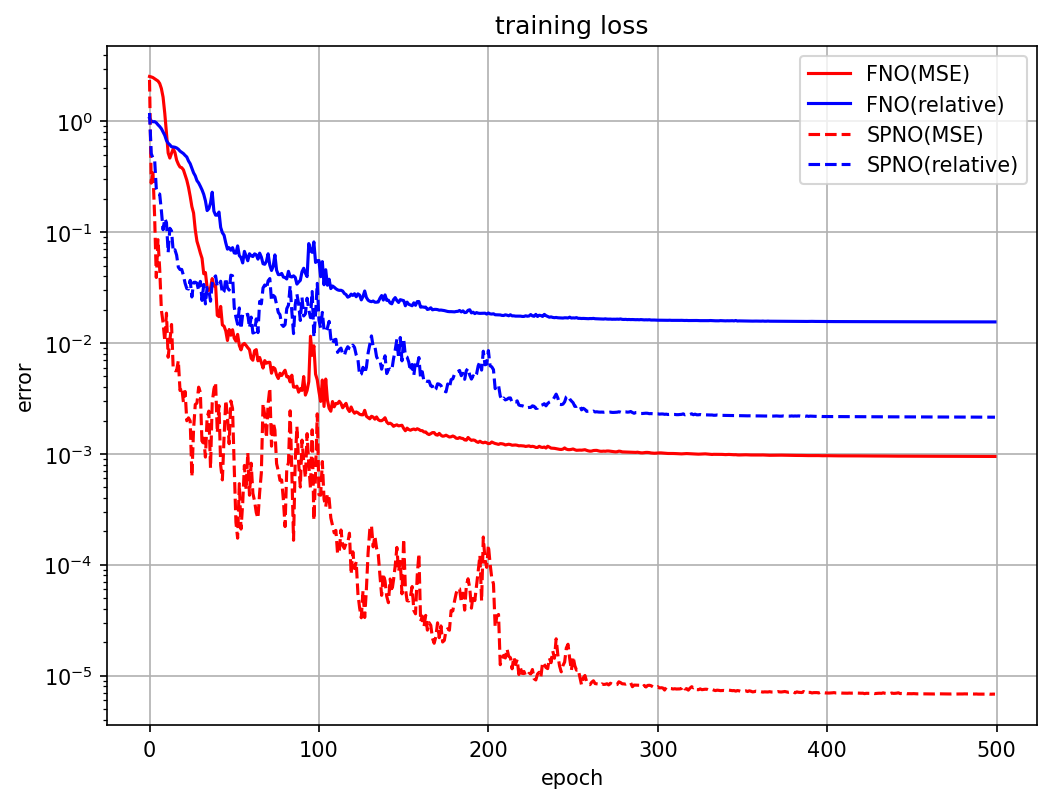

In [7]:
x_data = np.load('data/spde_1_x.npy')
y_data = np.load('data/spde_1_y.npy')
x_grid = np.linspace(0,1,x_data.shape[-1])

model_1 = torch.load('model/fno_smalldata')
model_2 = torch.load('model/spno_smalldata')
x_test = x_data[-100:,::10]
y_test = y_data[-100:,::10]
x_grid = x_grid[::10]
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)
x_test = torch.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_1 = torch.zeros(y_test.shape)
pred_2 = torch.zeros(y_test.shape)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
index = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.cuda(), y.cuda()
        out_1 = model_1(x).view(-1)
        out_2 = model_2(x).view(-1)
        pred_1[index] = out_1
        pred_2[index] = out_2
        index += 1
res_1 = pred_1-y_test
res_2 = pred_2-y_test

fig0 = plt.figure(figsize=(8,3),dpi=150)
plt.subplot(1,3,1)
plt.title("ground truth")
for i in range(100):
    plt.plot(x_grid,y_test[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_g$")
plt.grid()

plt.subplot(1,3,2)
plt.title("FNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_1[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()

plt.subplot(1,3,3)
plt.title("SPNO prediction")
for i in range(100):
    plt.plot(x_grid,pred_2[i],'k-')
plt.xlabel("x")
plt.ylabel("$u_p$")
plt.grid()
plt.tight_layout()
plt.show()


fig1 = plt.figure(figsize=(8,6),dpi=150)
plt.title("residuals")
for i in range(100):
    if i==0:
        plt.plot(x_grid,res_1[i],'r--',zorder=1,label='FNO')
        plt.plot(x_grid,res_2[i],'b-',zorder=2,label='SPNO')
    else:
        plt.plot(x_grid,res_1[i],'r--',zorder=1)
        plt.plot(x_grid,res_2[i],'b-',zorder=2)
plt.xlabel("x")
plt.ylabel("$u_g$-$u_p$")
plt.grid()
plt.legend()
plt.show()



data_1 = np.load('data/fno_loss_smalldata.npy')
data_2 = np.load('data/spno_loss_smalldata.npy')
fig2 = plt.figure(figsize=(8,6),dpi=150)
plt.title("training loss")
plt.plot(data_1[0],'r-',label='FNO(MSE)')
plt.plot(data_1[1],'b-',label='FNO(relative)')
plt.plot(data_2[0],'r--',label='SPNO(MSE)')
plt.plot(data_2[1],'b--',label='SPNO(relative)')
plt.legend()
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("error")
plt.grid()
plt.show()

fig0.savefig("img/fewshot_prediction.png")
fig1.savefig("img/fewshot_residual.png")
fig2.savefig("img/fewshot_loss.png")